# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [15]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso



#### Génération de donnée synthétiques

In [27]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh = n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso


In [28]:


alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


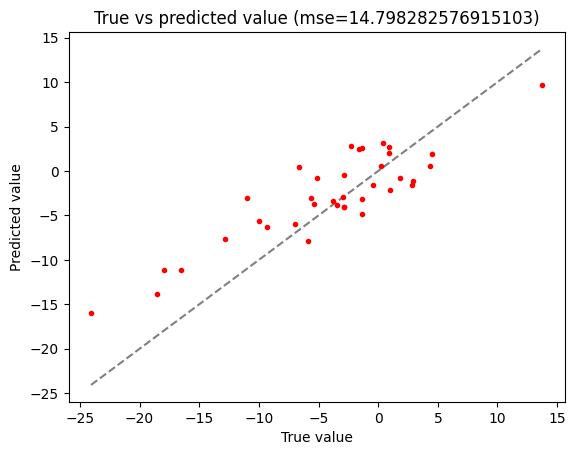

In [30]:
fig = plt.figure()
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='grey', linestyle='--', label="pente 1")
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



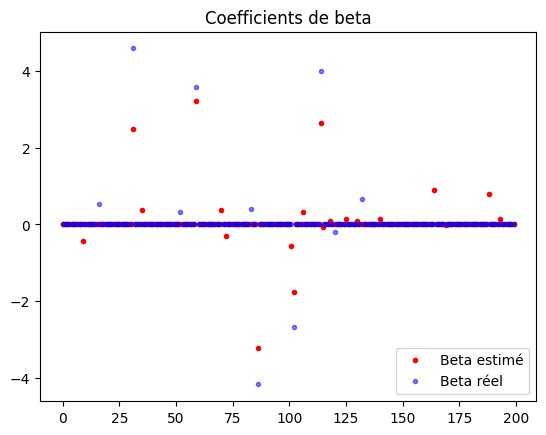

In [32]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.', alpha=0.5)
plt.legend(('Beta estimé', 'Beta réel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:#10BAFA">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:#10BAFA">REPONSE 1</span> :

Pour n=1000\
Le résultat est bien meilleur que pour n=75. \
La pente de ypred/ytest est d'environ 0.9.\
Les coefficients estimés ont tous une norme un peu plus faible que les coefficients réels.

Pour n=100\
Le résultat est assez bon. \
La pente de ypred/ytest est d'environ 1, avec un peu plus de dispersion que pour n=1000\
Les coefficients estimés ont tous une norme un peu plus faible que les coefficients réels.

Pour n=50\
Le résultat est mauvais. \
La pente de ypred/ytest est dans les choux (environ 0.3), et très dispersé.\
Les coefficients estimés ont souvent une norme  plus faible que les coefficients réels, et sont également dans les choux.

Pour n=25\
Il faudrait un idéologue marxiste pour trouver un rapport entre le résultat et la réalité.


### <span style="color:#10BAFA">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisée de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:#10BAFA">REPONSE 2</span> :

In [ ]:

from sklearn.model_selection import KFold


In [57]:
# number of folds
K = 8
# possible alphas (log version)
alphas = 10**np.arange(0, 8, 1)/10**6
# possible alphas, lin version
alphas = np.arange(0.001, 2, 0.2)
# best alphas are between 0.1 and 1
alphas = np.linspace(0.1, 0.8, 20)

print(f" Possible alphas : {alphas}")
# alpha dict to store results
alphadict = {}




 Possible alphas : [0.1        0.13684211 0.17368421 0.21052632 0.24736842 0.28421053
 0.32105263 0.35789474 0.39473684 0.43157895 0.46842105 0.50526316
 0.54210526 0.57894737 0.61578947 0.65263158 0.68947368 0.72631579
 0.76315789 0.8       ]


KFold(n_splits=8, random_state=None, shuffle=False)
Fold 0 for alpha 0.1
Fold 1 for alpha 0.1
Fold 2 for alpha 0.1
Fold 3 for alpha 0.1
Fold 4 for alpha 0.1
Fold 5 for alpha 0.1
Fold 6 for alpha 0.1
Fold 7 for alpha 0.1
Fold 0 for alpha 0.1368421052631579
Fold 1 for alpha 0.1368421052631579
Fold 2 for alpha 0.1368421052631579
Fold 3 for alpha 0.1368421052631579
Fold 4 for alpha 0.1368421052631579
Fold 5 for alpha 0.1368421052631579
Fold 6 for alpha 0.1368421052631579
Fold 7 for alpha 0.1368421052631579
Fold 0 for alpha 0.1736842105263158
Fold 1 for alpha 0.1736842105263158
Fold 2 for alpha 0.1736842105263158
Fold 3 for alpha 0.1736842105263158
Fold 4 for alpha 0.1736842105263158
Fold 5 for alpha 0.1736842105263158
Fold 6 for alpha 0.1736842105263158
Fold 7 for alpha 0.1736842105263158
Fold 0 for alpha 0.2105263157894737
Fold 1 for alpha 0.2105263157894737
Fold 2 for alpha 0.2105263157894737
Fold 3 for alpha 0.2105263157894737
Fold 4 for alpha 0.2105263157894737
Fold 5 for alpha 0.21052

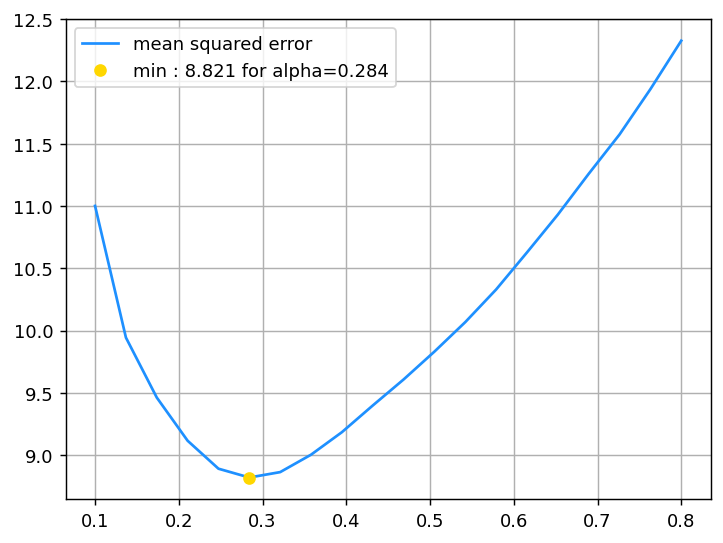

In [65]:
# kfold train
kf = KFold(n_splits = K , shuffle=False, random_state=None)
print(kf)
# compute splits on the dataset
kf.get_n_splits(X)


for alpha in alphas :
    mse_splits = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {i} for alpha {alpha}")
        #print(f"  Train: index={train_index}")
        #print(f"  Test:  index={test_index}")
        # effectively split data based on computed fold
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        # train on split DEPENDING ON ALPHA
        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)
        y_pred_lasso = lasso_regressor.predict(X_test)
        # compute and store error
        mse_split = mean_squared_error(y_test, y_pred_lasso)
        mse_splits.append(mse_split)

    # mean error on splits
    mse_allsplits = np.mean(mse_splits)
    # store result
    alphadict.update({alpha : mse_allsplits})


print(alphadict)
alphasR, msqR = list(alphadict.keys()), list(alphadict.values())

plt.figure(dpi=130)
plt.plot(alphasR, msqR, color="dodgerblue", label="mean squared error")
plt.plot(alphasR, msqR, color="gold", linestyle='', marker="o", markevery=[np.argmin(msqR)], 
label=f"min : {round(np.min(msqR), 3)} for alpha={round(alphasR[np.argmin(msqR)], 3)}")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:#10BAFA">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:#10BAFA">REPONSE 3</span> :


In [66]:


from sklearn.linear_model import LinearRegression


In [ ]:
def BIC(mse, n, q):
    return n * np/log(mse) + (q-1)*log(n)

def learn_error(selected_index, X, y):
    # train
    X_train = X[selected_index]
    y_train = y[selected_index]
    X_test = X[selected_index]
    y_test = y[selected_index]
    # compute error

    return msqe

range(0, 30)

In [ ]:
selectedindex = [0]
unselectedindex = range(1, p)
def ForwardSelection():
    for q in range(p):
        
